In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [98]:
filename = 'Concrete_Data_Yeh_final.csv'
variables = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

class PreProcessing:
    "The aim of this class is to successfully replace all the empty values from"
    "the file given, and to split the columns into their own series / arrays."
    def __init__(self, file):
        self.data = pd.read_csv(file)

    def checkNaN (self):
        return self.data.isnull().sum()

    def FillNaN (self) -> pd.DataFrame:
        # Here we used the .mean method to replace the NaN values from the original dataset. 
        # (Please check this as we may use an alternative fillna method)
        for i in self.data.columns:
            self.data[i].fillna(self.data[i].mean(), inplace = True)
        return self.data

test = PreProcessing(filename).checkNaN()
print('Number of NaN values in each column from the original csv file: \n' ,test)

concretedata = PreProcessing(filename).FillNaN()
concretedata.head(10)

Number of NaN values in each column from the original csv file: 
 cement               0
slag                 6
flyash               1
water                8
superplasticizer    14
coarseaggregate      7
fineaggregate        3
age                  5
csMPa                0
dtype: int64


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.000000,2.500000,1040.0,676.0,28.000000,79.99
1,540.0,0.0,0.0,162.000000,2.500000,1055.0,676.0,28.000000,61.89
2,332.5,142.5,0.0,228.000000,0.000000,932.0,594.0,270.000000,40.27
3,332.5,142.5,0.0,228.000000,0.000000,932.0,594.0,45.427317,41.05
4,198.6,132.4,0.0,192.000000,0.000000,978.4,825.5,360.000000,44.30
5,266.0,114.0,0.0,228.000000,6.219882,932.0,670.0,90.000000,47.03
6,380.0,95.0,0.0,228.000000,0.000000,932.0,594.0,365.000000,43.70
7,380.0,95.0,0.0,228.000000,0.000000,932.0,594.0,28.000000,36.45
8,266.0,114.0,0.0,181.506262,0.000000,932.0,670.0,28.000000,45.85
9,475.0,0.0,0.0,228.000000,0.000000,932.0,594.0,28.000000,39.29


In [99]:
# Provides the statistical summary of the data #
concretedata.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.668652,54.122838,181.506262,6.219882,972.653959,773.698150,45.427317,35.817961
std,104.506364,85.973892,63.962458,21.039881,5.925527,77.659130,79.896863,62.324091,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,733.250000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.300000,28.000000,34.445000
75%,350.000000,142.500000,118.300000,192.000000,10.175000,1029.150000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [100]:
'''Include this scaling step after loading the data and before splitting it into training and testing sets. The idea behind MinMaxScaler is to scale the features to a specified range, typically between 0 and 1, making them comparable and preventing features with larger scales from dominating the model.

The decision to scale depends on the specific characteristics of the data and the algorithm being used. While some algorithms are more sensitive to feature scales (e.g., Support Vector Machines, k-Nearest Neighbors), others, like decision trees, are less affected. For linear regression, scaling may improve convergence and the interpretability of coefficients.'''


'Include this scaling step after loading the data and before splitting it into training and testing sets. The idea behind MinMaxScaler is to scale the features to a specified range, typically between 0 and 1, making them comparable and preventing features with larger scales from dominating the model. The decision to scale depends on the specific characteristics of the data and the algorithm being used. While some algorithms are more sensitive to feature scales (e.g., Support Vector Machines, k-Nearest Neighbors), others, like decision trees, are less affected. For linear regression, scaling may improve convergence and the interpretability of coefficients.'

In [101]:
'''The better Method for scaling was Mervyn's method, which is to scale the training and testing sets separately. This is done by first fitting the scaler to the training set and then transforming both the training and testing sets using the scaler. (scaling separately for training and testing sets) is generally preferred because it ensures that the scaling parameters are learned only from the training set, preventing any information from the testing set from influencing the scaling process. This approach is crucial to maintain the independence of the testing set and obtain unbiased model evaluations.
 The code below shows how to do this using the MinMaxScaler from scikit-learn:
'''


"The better Method for scaling was Mervyn's method, which is to scale the training and testing sets separately. This is done by first fitting the scaler to the training set and then transforming both the training and testing sets using the scaler. (scaling separately for training and testing sets) is generally preferred because it ensures that the scaling parameters are learned only from the training set, preventing any information from the testing set from influencing the scaling process. This approach is crucial to maintain the independence of the testing set and obtain unbiased model evaluations.\n The code below shows how to do this using the MinMaxScaler from scikit-learn:\n"

In [102]:
# Create a scaler
scaler = MinMaxScaler()

# Split the DataFrame into training and testing sets - train_test_split is a function from sklearn.
trainingconcretedata, testingconcretedata = train_test_split(concretedata, test_size=0.2, random_state=42)

# Fit the scaler on the training set and transform it
CDtrainscale = pd.DataFrame(scaler.fit_transform(trainingconcretedata), columns=concretedata.columns)

# Transform the testing set
CDtestscale = pd.DataFrame(scaler.transform(testingconcretedata), columns=concretedata.columns)

In [103]:
# To check if the general shape of both the training and testing sets are reasonable. This can be adjusted if bias is found. #
print(CDtrainscale.shape, CDtestscale.shape)

(824, 9) (206, 9)


In [104]:
#  Note: The regression model is only applied to the scaled data sets.
def RegressionModel(testset, trainset, regression, metriclist):
    heatmapdata = {}
    for i in testset.columns[:-1]:
        x_test = testset[i].to_numpy().reshape(-1, 1)
        y_test = testset['csMPa'].to_numpy().reshape(-1, 1)
        x_train = trainset[i].to_numpy().reshape(-1, 1)
        y_train = trainset['csMPa'].to_numpy().reshape(-1, 1)

        regressor = regression()
        regressor.fit(x_train, y_train.ravel())  # Use ravel() to avoid the DataConversionWarning

        if hasattr(regressor, 'coef_'):
            # For linear models
            heatmapdata[i] = float(regressor.coef_)
        elif hasattr(regressor, 'feature_importances_'):
            # For tree-based models (e.g., RandomForestRegressor)
            heatmapdata[i] = float(np.mean(regressor.feature_importances_))
        else:
            raise AttributeError(f"Regressor {regressor} does not have 'coef_' or 'feature_importances_' attribute.")

        metrics = []
        for j in metriclist:
            y_pred = regressor.predict(x_test)
            # Append a tuple with the metric name and value to the list
            metrics.append((j.__name__, j(y_test, y_pred)))

        print(pd.DataFrame(metrics, columns=['Metric', 'Value']))

        plt.figure(figsize=(8, 4))
        plt.scatter(x_test, y_test, color='blue', label='Actual', s=5)
        plt.plot(x_test, y_pred, color='red', label='Predicted')
        plt.title(f'Score: {regressor.score(x_test, y_test)}')
        plt.xlabel(i)
        plt.ylabel('Compression Strength (MPa)')
        plt.legend()
        plt.show()

    return heatmapdata


In [105]:
'''In the context of a simple linear regression (which seems to be the case here, as each variable is processed individually), the regression line is represented by the equation:
y=mx+b

where:
y is the dependent variable (Compressive Strength, csMPa),
x is the independent variable (a feature from the dataset),
m is the coefficient (gradient) obtained from the regression model,
b is the y-intercept.
Therefore, the gradient of the regression line (m) tells us how much the dependent variable (y) is expected to change for a one-unit change in the independent variable (x). If the gradient is positive, it suggests a positive correlation: an increase in x is associated with an increase in y. 
If the gradient is negative, it suggests a negative correlation: an increase in x is associated with a decrease in y.'''

'In the context of a simple linear regression (which seems to be the case here, as each variable is processed individually), the regression line is represented by the equation:\ny=mx+b\n\nwhere:\ny is the dependent variable (Compressive Strength, csMPa),\nx is the independent variable (a feature from the dataset),\nm is the coefficient (gradient) obtained from the regression model,\nb is the y-intercept.\nTherefore, the gradient of the regression line (m) tells us how much the dependent variable (y) is expected to change for a one-unit change in the independent variable (x). If the gradient is positive, it suggests a positive correlation: an increase in x is associated with an increase in y. \nIf the gradient is negative, it suggests a negative correlation: an increase in x is associated with a decrease in y.'

In [106]:
'''In the context of the code:

"heatmapdata[i] = float(regressor.coef_)"

Here, regressor.coef_ represents the coefficient (gradient) of the regression line, and it is stored in the dictionary heatmapdata for each feature (i). This information is then used to create a heatmap, presumably visualizing the importance or influence of each feature on the Compressive Strength.'''

'In the context of the code:\n\n"heatmapdata[i] = float(regressor.coef_)"\n\nHere, regressor.coef_ represents the coefficient (gradient) of the regression line, and it is stored in the dictionary heatmapdata for each feature (i). This information is then used to create a heatmap, presumably visualizing the importance or influence of each feature on the Compressive Strength.'

               Metric     Value
0  mean_squared_error  0.029967
1            r2_score  0.250678


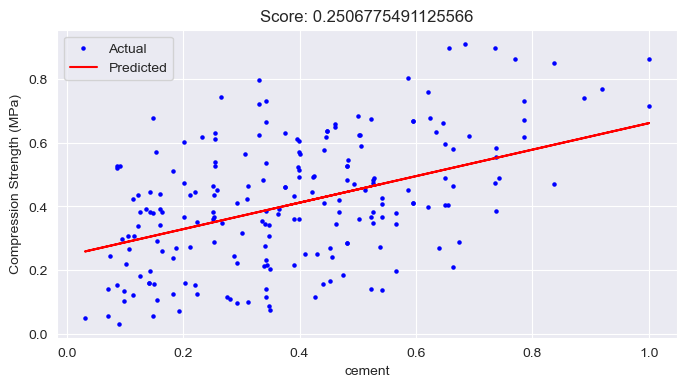

               Metric     Value
0  mean_squared_error  0.040369
1            r2_score -0.009442


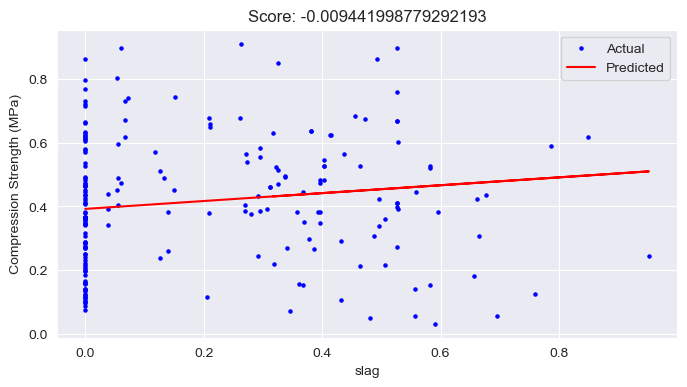

               Metric     Value
0  mean_squared_error  0.041933
1            r2_score -0.048536


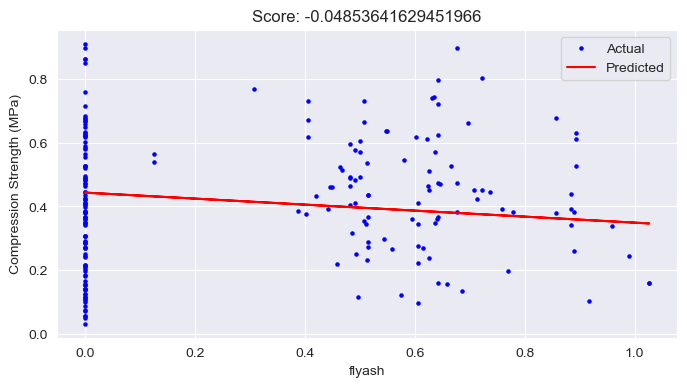

               Metric     Value
0  mean_squared_error  0.036132
1            r2_score  0.096504


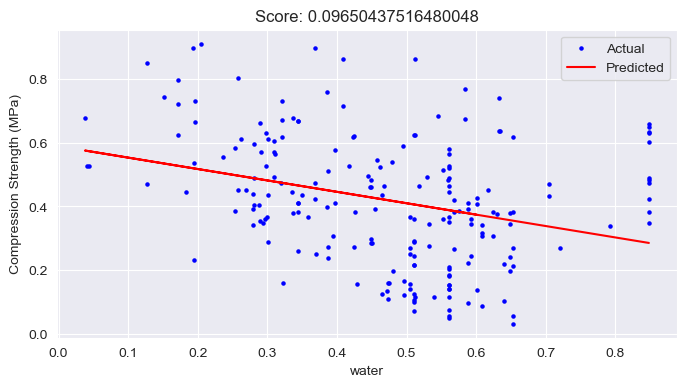

               Metric     Value
0  mean_squared_error  0.033258
1            r2_score  0.168375


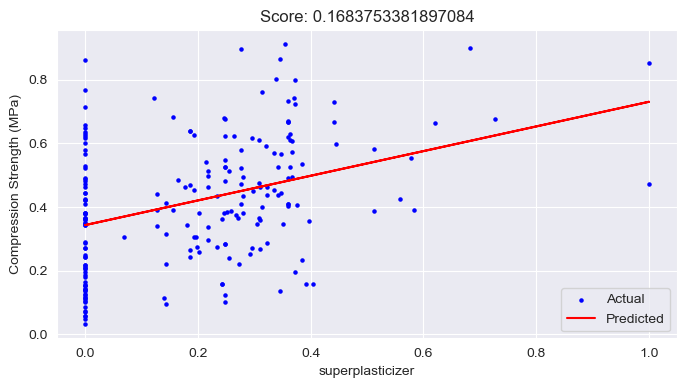

               Metric     Value
0  mean_squared_error  0.039352
1            r2_score  0.015992


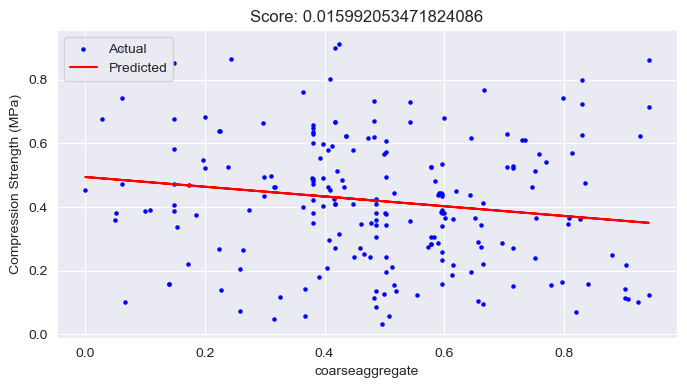

               Metric     Value
0  mean_squared_error  0.038578
1            r2_score  0.035346


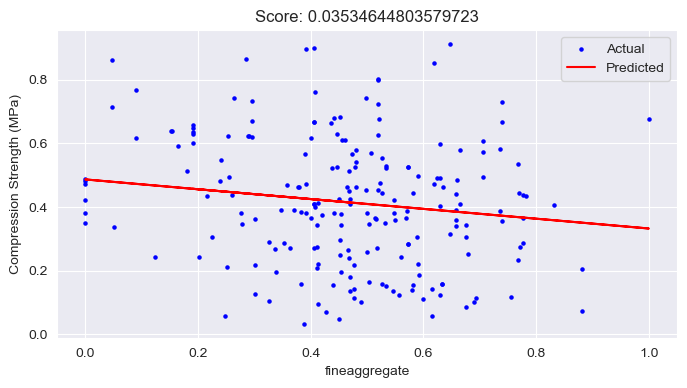

               Metric     Value
0  mean_squared_error  0.035632
1            r2_score  0.109001


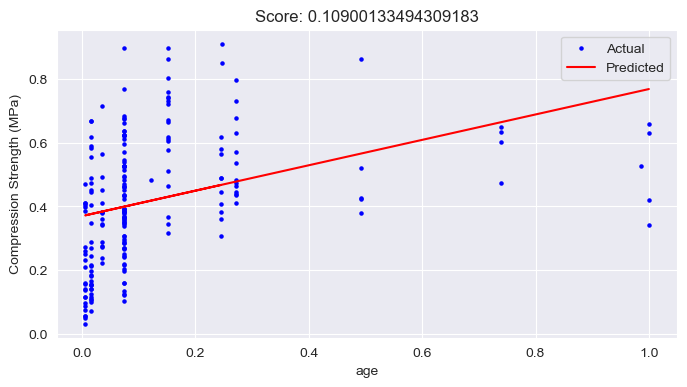

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


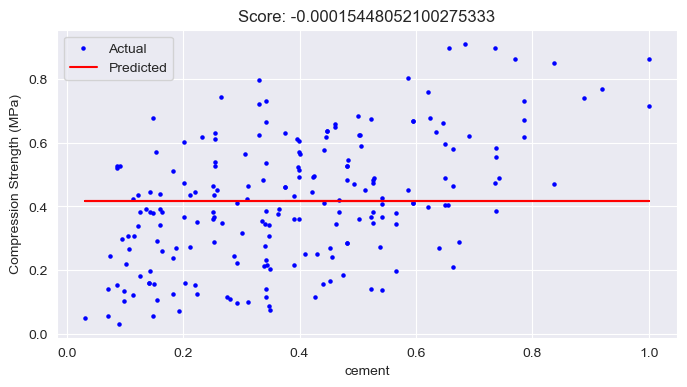

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


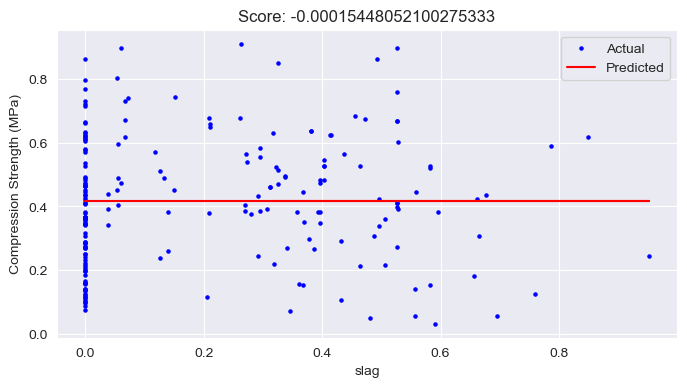

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


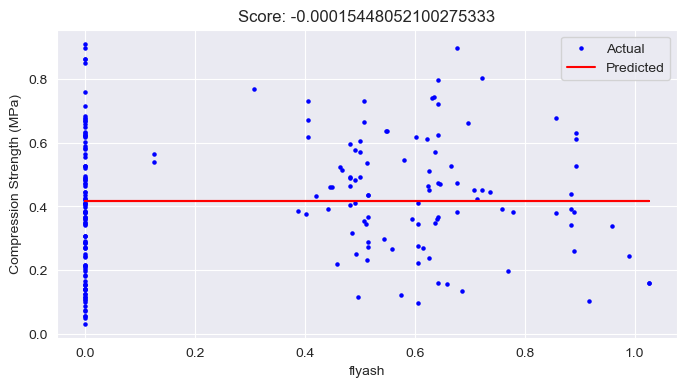

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


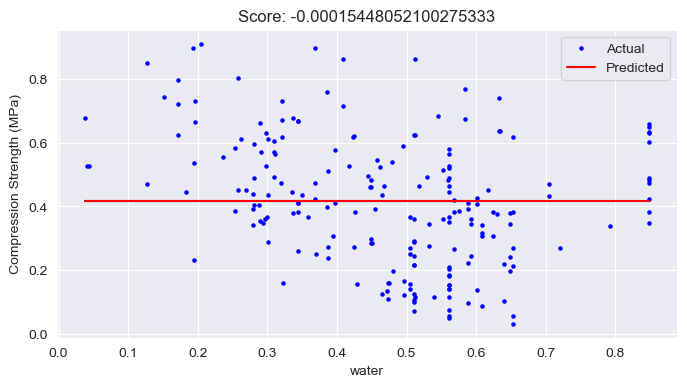

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


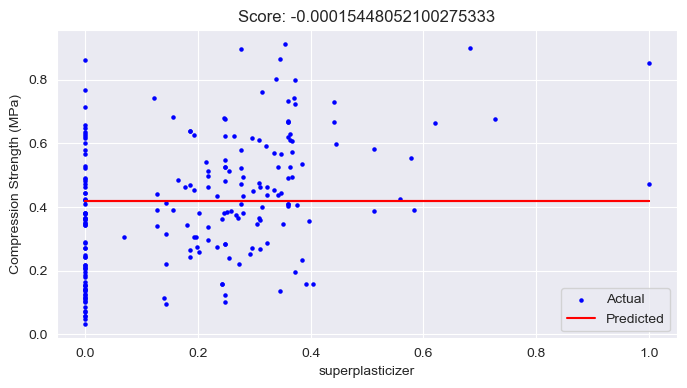

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


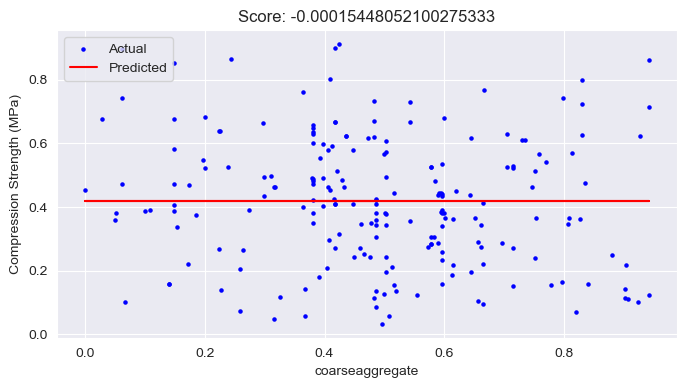

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


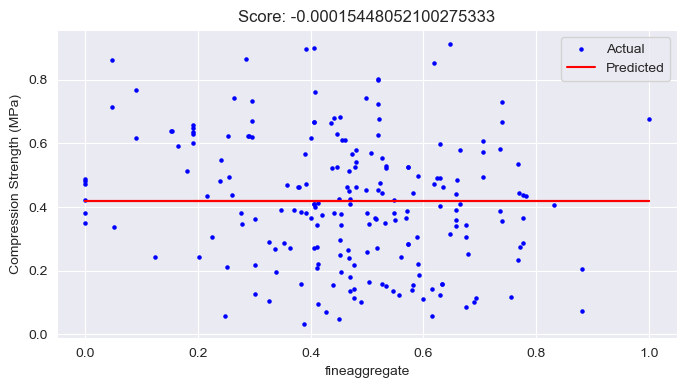

               Metric     Value
0  mean_squared_error  0.039998
1            r2_score -0.000154


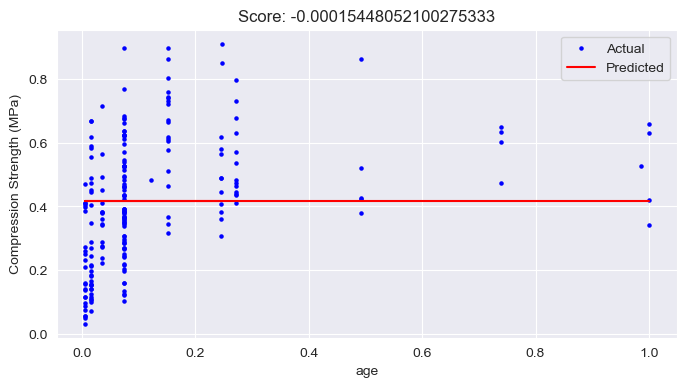

               Metric     Value
0  mean_squared_error  0.029010
1            r2_score  0.274606


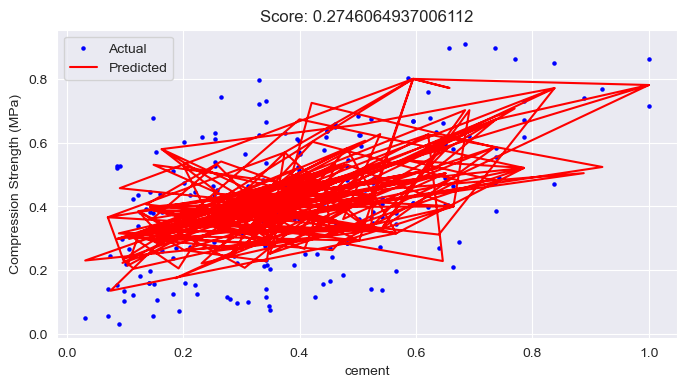

               Metric     Value
0  mean_squared_error  0.037656
1            r2_score  0.058394


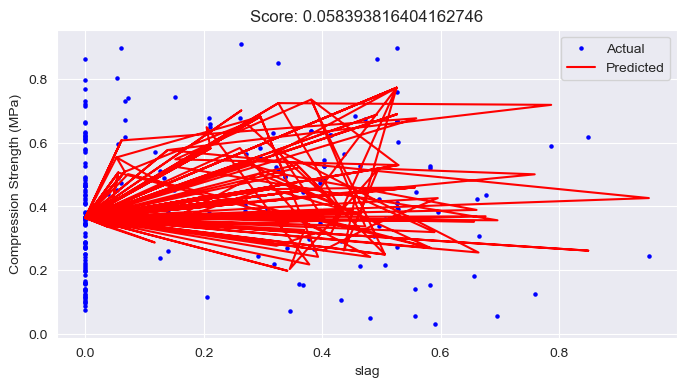

               Metric     Value
0  mean_squared_error  0.039302
1            r2_score  0.017253


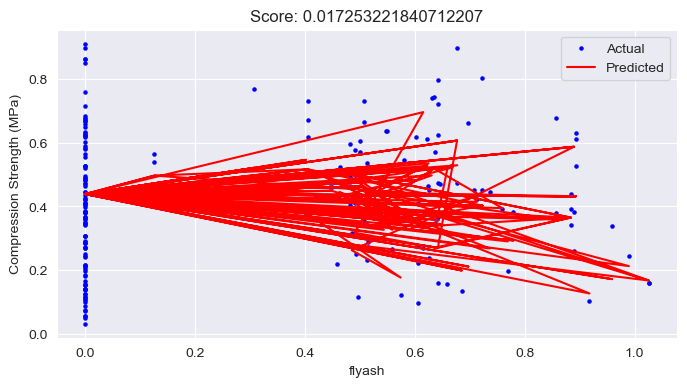

               Metric     Value
0  mean_squared_error  0.030089
1            r2_score  0.247619


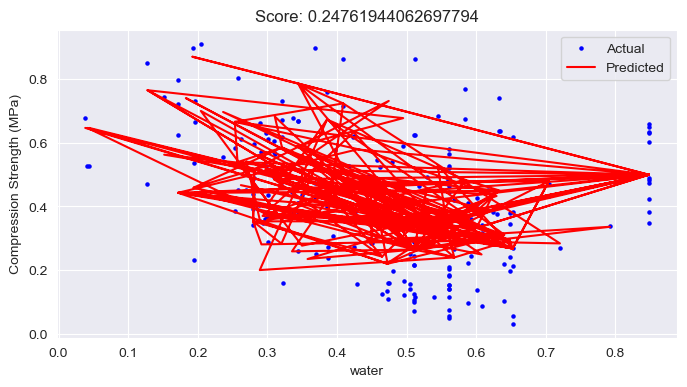

               Metric     Value
0  mean_squared_error  0.034511
1            r2_score  0.137034


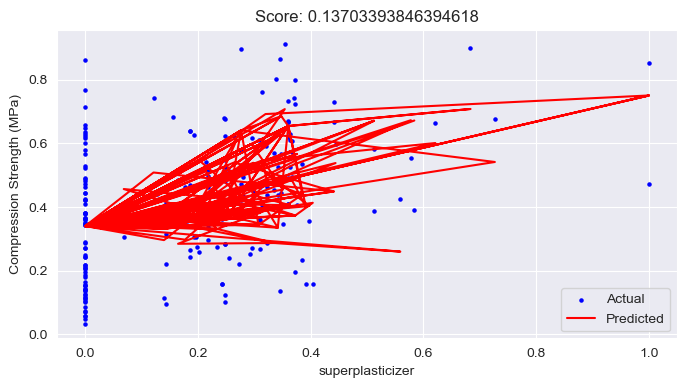

               Metric     Value
0  mean_squared_error  0.033607
1            r2_score  0.159638


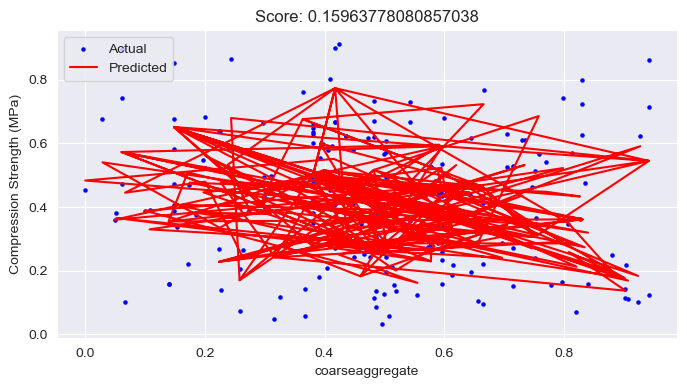

               Metric     Value
0  mean_squared_error  0.034073
1            r2_score  0.148000


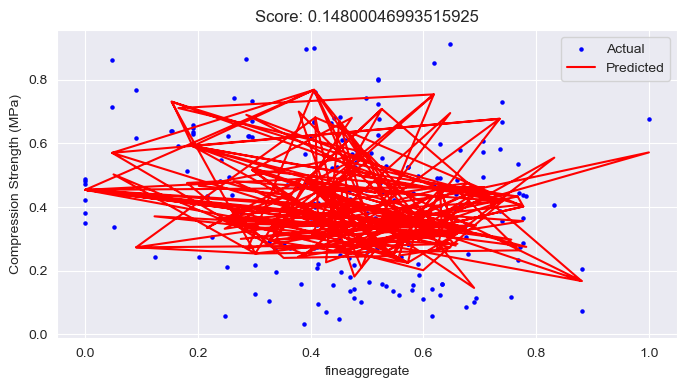

               Metric     Value
0  mean_squared_error  0.024742
1            r2_score  0.381311


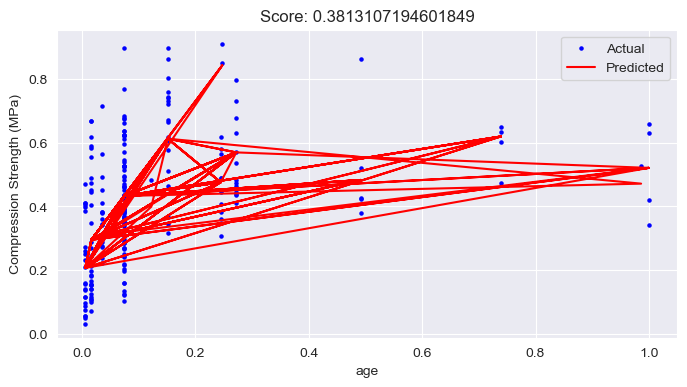

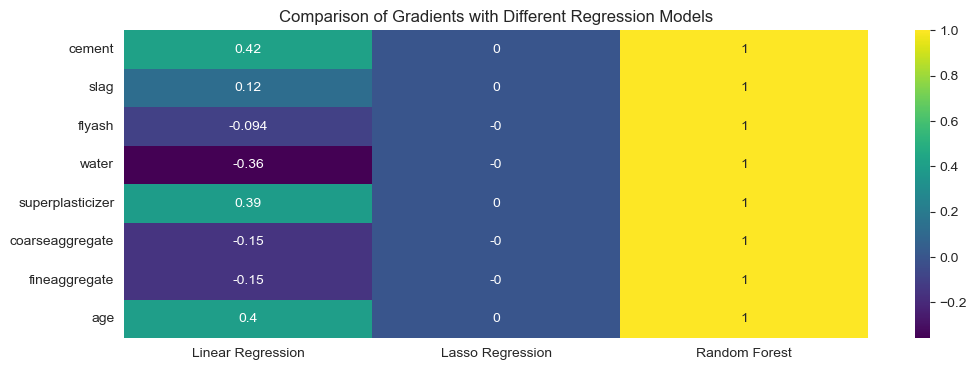

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of metric functions
metrics = [mean_squared_error, r2_score]

# Linear Regression
linear_regression_heatmap = RegressionModel(CDtestscale, CDtrainscale, Ridge, metrics)

# Lasso Regression
lasso_heatmap = RegressionModel(CDtestscale, CDtrainscale, Lasso, metrics)

# Random Forest Regression
rf_heatmap = RegressionModel(CDtestscale, CDtrainscale, RandomForestRegressor, metrics)

# Create a combined heatmap
combined_heatmap = pd.DataFrame({
    'Linear Regression': linear_regression_heatmap,
    'Lasso Regression': lasso_heatmap,
    'Random Forest': rf_heatmap
})

# Visualize the combined heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(combined_heatmap, annot=True, cmap='viridis')
plt.title('Comparison of Gradients with Different Regression Models')
plt.show()

In [108]:
'''# Create the heatmap to show the trends with variables against Compressive Strength.
df = pd.DataFrame([heatmapdata])
df.index = ['csMPa']
plt.figure(figsize=(8, 1))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Gradient of variables against Compressive Strength using Linear Regression')'''

"# Create the heatmap to show the trends with variables against Compressive Strength.\ndf = pd.DataFrame([heatmapdata])\ndf.index = ['csMPa']\nplt.figure(figsize=(8, 1))\nsns.heatmap(df, annot=True, cmap='viridis')\nplt.title('Gradient of variables against Compressive Strength using Linear Regression')"

In [109]:
# To clarify the common number that appears on slag, flyash and superplasticizer.
concretedata.mode()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,362.6,0.0,0.0,192.0,0.0,932.0,594.0,28.0,33.4
1,425.0,NaN,NaN,NaN,NaN,NaN,755.8,NaN,NaN


Some thoughts:
In Lasso Regression, the L1 regularization can drive some coefficients to exactly zero, effectively performing feature selection. In this case, it seems that Lasso has set the coefficients for all features to zero, indicating that it considers those features less relevant - which i think shouldnt be the case but maybe im wrong.
Random Forest does not provide coefficients like linear models. Instead, it gives feature importances. The values you see (all equal to 1.0) suggest that all features are considered equally important by the Random Forest model. This is a common output when using the mean feature importance across multiple trees. I tried to increase the number of trees (n_estimators) to see if the feature importances change. using the code below but got stuck for an hour tryna troubleshoot why it didnt work, so if anyone wants to pick it up from there please do so, otherwise we can do the following later today(perform the same analysis on the unscaled data sets and compare outputs and performance by looking at the metrics):
    code i used to try and increase the number of trees but failed miserably - kept getting the error "TypeError: randomforestregressor' object is not callable" and yeah i called it quits after not even gpt could helo me out:
        rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        rf_heatmap_tuned = RegressionModel(CDtestscale, CDtrainscale, rf, metrics)